## Header

Author : Amina Matt    
Date created : 25.04.2022  
Date last mofidied : 25.04.2022  
Description :  Pre-processing of publicly available [Ukraine Conflict Twitter Dataset](https://www.kaggle.com/datasets/bwandowando/ukraine-russian-crisis-twitter-dataset-1-2-m-rows) and descriptive statistics

In [3]:
### Libraries

import pandas as pd
import numpy as np
#import twitter
import zipfile

import nltk #natural language processing library
nltk.download('stopwords') #common english words to ignore 
from bs4 import BeautifulSoup #extraction from HTML and XML files
from collections import Counter #dictionary subclass for counting hashable objects

import swifter # for optimization of apply

# Parameters
pd.set_option('display.max_colwidth', 255)

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/aminamatt/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


### Path 

In [5]:
# The dataset is store on an external volume
PATH = '/Volumes/PECHE/archive_Twitter_Conflict.zip'
gen_data_PATH = '/Users/aminamatt/Dropbox/Cours-printemps-2022/Computational-Social-Media/Project/Generated_Data/'

In [28]:
#pd.read_csv('/Volumes/PECHE/archive_Twitter_Conflict.zip',compression='zip')

## 1. Loading  data

In [30]:
# # # # the zip archive contains multiple files

# all_zips = zipfile.ZipFile(PATH)

# #df = pd.concat(
# #    [pd.read_csv(zipfile.ZipFile(PATH).open(i)) for i in zipfile.ZipFile(PATH).namelist()],
# #    ignore_index=True
# #)
# df = pd.DataFrame()
# index = 0 
# for i in all_zips.namelist():
#     if (i.startswith('Ukraine')):
#         print(f'Loading {i}')
#         tmp = pd.read_csv(zipfile.ZipFile(PATH).open(i),compression='gzip')  # add options index_col=0,encoding='utf-8', quoting=csv.QUOTE_ALL
#         df = pd.concat([df,tmp])
# #     index = index+1
# #     if (index==22) :
# #         break

### DATA

In [32]:
# pickle the df to be used later 
#df.to_pickle(gen_data_PATH+'FEB_MARCH_dataframe.pkl')
#df_feb_march_ref = pd.read_pickle(gen_data_PATH+'feb_march_en_refugee_raw.pkl')
df_april= pd.read_pickle(gen_data_PATH+'Generated_Dataapril_dataframe.pkl.pkl')

In [33]:
len(df_feb_march_ref)

38310

## Catenate February, March and April months

In [7]:
df_feb_march = pd.read_pickle(gen_data_PATH+'FEB_MARCH_dataframe.pkl')
#df_april = pd.read_pickle(gen_data_PATH+'Generated_Dataapril_dataframe.pkl')#

In [8]:
#df = pd.concat([df_feb_march,df_april])

### Rows

In [9]:
print(f'The FEBRUARY MARCH dataset contains {len(df_feb_march)} tweet entries')

The FEBRUARY MARCH dataset contains 15583279 tweet entries


In [11]:
df = df_feb_march

In [ ]:
print(f'The APRIL dataset contains {len(df_april)} tweet entries')

### Columns

In [12]:
df.columns.to_list()

['Unnamed: 0',
 'userid',
 'username',
 'acctdesc',
 'location',
 'following',
 'followers',
 'totaltweets',
 'usercreatedts',
 'tweetid',
 'tweetcreatedts',
 'retweetcount',
 'text',
 'hashtags',
 'language',
 'coordinates',
 'favorite_count',
 'extractedts']

### Sample

In [13]:
df[['location','tweetid','tweetcreatedts','text','hashtags','language']].sample(5)

KeyboardInterrupt: 

## 2. Dataset selection
We want to keep only english and refugee related tweets

In [14]:
# available languages 
lan = df['language'].value_counts().sort_values(ascending=False)[0:10]

In [15]:
lan_per = lan.apply(lambda x : x/len(df)*100)

Text(0.5, 1.0, 'Language distribution of the April dataset')

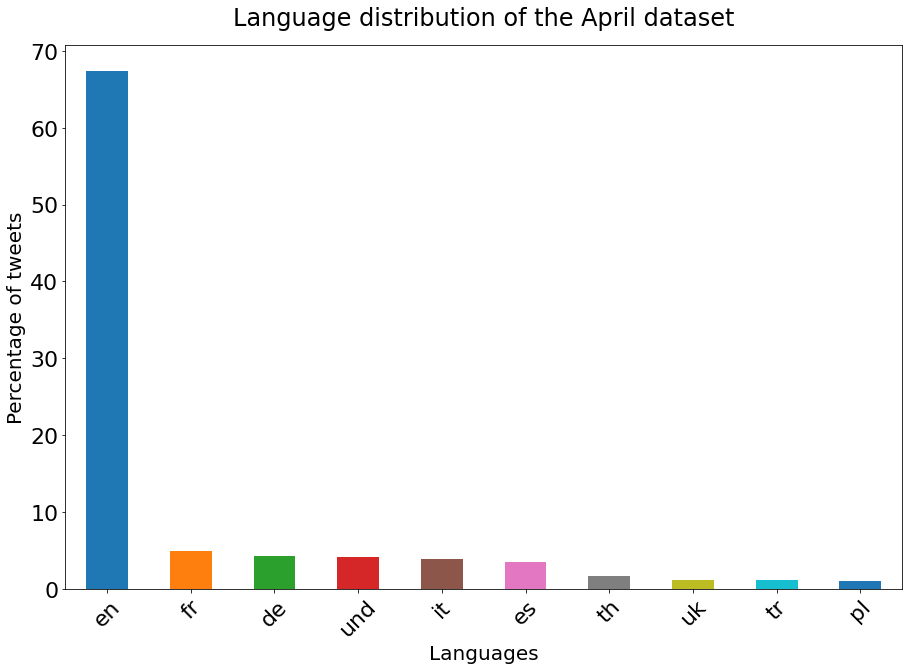

In [16]:
# plot
plt = lan_per.plot.bar(rot=45,figsize=(15, 10),color=['C0', 'C1', 'C2','C3','C5','C6','C7','C8','C9','C10'])

# parameters
plt.set_ylabel('Percentage of tweets',fontdict={'fontsize':20})
plt.set_xlabel('Languages',fontdict={'fontsize':20})
plt.tick_params(axis='x', which='both', labelsize=22)
plt.tick_params(axis='y', which='both', labelsize=22)
plt.set_title('Language distribution of the April dataset',pad=20, fontdict={'fontsize':24})

In [17]:
# english selection
df_en_raw = df[df['language']== 'en']
len_en_raw = len(df_en_raw['tweetid'])
# french selection
df_fr_raw = df[df['language']== 'fr']
len_fr_raw = len(df_fr_raw['tweetid'])

#### De-duplication

In [13]:
df_en_raw.head()

,Unnamed: 0,userid,username,acctdesc,location,following,followers,totaltweets,usercreatedts,tweetid,...,original_tweet_id,original_tweet_userid,original_tweet_username,in_reply_to_status_id,in_reply_to_user_id,in_reply_to_screen_name,is_quote_status,quoted_status_id,quoted_status_userid,quoted_status_username
0,0,16882774,Yaniela,"Animal lover, supports those who fight injustice wherever it raises its evil head. Personality flaws: Grumpy on occasion, cannot tolerate stupidity. #VOTEBLUE",Hawaii,1158,392,88366,2008-10-21 07:34:04.000000,1509681950042198030,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,3205296069,gregffff,NaN,NaN,122,881,99853,2015-04-25 11:24:34.000000,1509681950151348229,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,1235940869812809728,ThanapornThon17,เล่นไวโอลิน\nพูดภาษาจีน,NaN,231,72,5481,2020-03-06 14:52:01.000000,1509681950683926556,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,1347985375566966784,I_Protest_2021,01000001 01101110 01101111 01101110 01111001 01101101 01101111 01110101 01110011 00100001,International Web Zone,399,377,301,2021-01-09 19:15:44.000000,1509681951116046336,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,1505394816636846083,Marsh_Win_01,🌿@Pickaw @TWITTERPICKER 🌿Winning isn’t everything🌾but wanting to win is🎊 #Marsh_Win_01 🌱,Hunter Account,158,25,8982,2022-03-20 04:04:40.000000,1509681951304990720,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [19]:
# To keep the original tweet, sort the dataframe by creation dates
df_en_raw = df_en_raw.sort_values(['tweetcreatedts'])
#df_en_raw.head(50)
#df_fr_raw = df_fr_raw.sort_values(['tweetcreatedts'])

In [20]:
# english 
df_en_unique = df_en_raw[df_en_raw.duplicated(subset=['text'], keep='first')==False]# the duplciated work as a mask, the false are not duplicated
len_df_en_uni = len(df_en_unique[df_en_unique==False])
per_en_unique = (len_df_en_uni/len_en_raw)*100
print('{:.4}% of the english tweets are retweet. There are {} english uniques tweets'.format(per_en_unique,len_df_en_uni))

24.73% of the english tweets are retweet. There are 2594755 english uniques tweets


In [ ]:
# french 
df_fr_unique = df_fr_raw[df_fr_raw.duplicated(subset=['text'], keep='first')==False] # the duplciated work as a mask, the false are not duplicated
len_df_fr_uni = len(df_fr_unique)
per_fr_unique = (len_df_fr_uni/len_fr_raw)*100
print('{:.4}% of the french tweets are retweet. There are {} french uniques tweets'.format(per_fr_unique,len_df_fr_uni))

### Dataset features

In [21]:
df_en = df_en_unique
#df_fr = df_fr_unique

In [22]:
per_en = len(df_en)/len(df)*100
print(f'There are {len(df_en)} unique english tweets.')

There are 2594755 unique english tweets.


In [19]:
per_fr = len(df_fr)/len(df)*100
print(f'There are {len(df_fr)} unique french tweets.')

There are 76517 unique french tweets.


In [23]:
keywords_en = ('refugee|migrant|asylum seeker')
keywords_fr = ('refugié|migrant|demandeur d\'asile')

In [24]:
# English tweets with REFUGEE in TEXT
ref_en = df_en[df_en['text'].str.contains(keywords_en)]
per_en_ref = len(ref_en)/len(df_en)*100
print(f'There are {len(ref_en)} english tweets containing refugee keywords.')
print('{:2.3}% of the english tweets are related to the refugee topic.'.format(per_en_ref))

There are 38310 english tweets containing refugee keywords.
1.48% of the french tweets are related to the refugee topic.


In [25]:
ref_en = pd.read_pickle(gen_data_PATH+'ref_en_unique_ref.pkl')

In [24]:
# French tweets with REFUGEE in TEXT
ref_fr = df_fr[df_fr['text'].str.contains(keywords_fr)]
per_fr_ref = len(ref_fr)/len(df_fr)*100
print(f'There are {len(ref_fr)} french tweets containing refugee keywords.')
print('{:2.3}% of the french tweets are related to the refugee topic.'.format(per_fr_ref))

There are 80 french tweets containing refugee keywords.
0.105% of the french tweets are related to the refugee topic.


#### Sample

In [25]:
ref_en[['location','tweetid','tweetcreatedts','text','hashtags','language']].sample(5)

,location,tweetid,tweetcreatedts,text,hashtags,language
214650,Web-based,1513540001686040576,2022-04-11 15:30:31.000000,The entire A2L library and supporting resources will be made available at no cost to schools supporting refugees.\n\nClick to learn more: https://t.co/IW4ZrDieiA\n\n#ukraine #refugeesupport #educationmatters #learningneverstops #helpspreadthenews htt...,"[{'text': 'ukraine', 'indices': [161, 169]}, {'text': 'refugeesupport', 'indices': [171, 186]}, {'text': 'educationmatters', 'indices': [187, 204]}, {'text': 'learningneverstops', 'indices': [205, 224]}, {'text': 'helpspreadthenews', 'indices': [225, ...",en
290340,The #UK 🇬🇧 and #EU 🇪🇺,1513938313429893127,2022-04-12 17:53:16.000000,@10DowningStreet @NadineDorries How many #Ukraine refugees have been given help in the Great #ENGLAND by this @Conservatives government?\n\nThe great British people have stepped up but absolutely no help by this government 🙄,"[{'text': 'Ukraine', 'indices': [41, 49]}, {'text': 'ENGLAND', 'indices': [93, 101]}]",en
100749,NaN,1510175909671837696,2022-04-02 08:42:49.000000,"Putin's generals and commanders are also responsible for Russia's atrocities. Many of them have experience bombing Syria, so they are masters in turning people into refugees and beautiful cities into graveyards. #StopRussia https://t.co/rDcYhnaITk",[],en
104546,Tamilnadu,1511973401564696576,2022-04-07 07:45:24.000000,Spanish Kindergarten children welcoming a new refugee student from Ukraine\n\n#Ukraine #UkraineRussia #UkraineRussiaConflict #Spain #Kindergarden #healing #healingjourney #classmates #Newstn https://t.co/QD6KjpDXW7,"[{'text': 'Ukraine', 'indices': [76, 84]}, {'text': 'UkraineRussia', 'indices': [85, 99]}, {'text': 'UkraineRussiaConflict', 'indices': [100, 122]}, {'text': 'Spain', 'indices': [123, 129]}, {'text': 'Kindergarden', 'indices': [130, 143]}, {'text': 'h...",en
338722,NaN,1511786255033450512,2022-04-06 19:21:45.000000,"A pleasure to talk with the Harvard EdCast &amp; reflect on what we can learn from other experiences of #refugeeeducation for millions of children fleeing #Ukraine, drawing on research in #RightWhereWeBelong https://t.co/MKKXSagvfe","[{'text': 'refugeeeducation', 'indices': [104, 121]}, {'text': 'Ukraine', 'indices': [155, 163]}, {'text': 'RightWhereWeBelong', 'indices': [188, 207]}]",en


In [293]:
ref_en[['text']].iloc[15]

text    Anyone saying that the #Ukraine conflict started in Feb is either lying or is clueless. The world has millions of more refugees today because of the regime change &amp; #NATO expansion headed by the US in 2014. Not to mention the US using our tax doll...
Name: 4286, dtype: object

In [294]:
ref_fr[['location','tweetid','tweetcreatedts','text','hashtags','language']].sample(5)

,location,tweetid,tweetcreatedts,text,hashtags,language
65800,NaN,1515940589283463168,2022-04-18 06:29:35.000000,Merci #OTAN et #Europe\nD offrir des esclaves sexuelles blanches ukrainiennes pour satisfaire les colons noirs et arabes\n@MarleneSchiappa va encore dire qu il faut aider #migrants et que tous ça c la faute a #Poutine\n#Ukraine #Islamisme #grandrempl...,"[{'text': 'OTAN', 'indices': [6, 11]}, {'text': 'Europe', 'indices': [15, 22]}, {'text': 'migrants', 'indices': [170, 179]}, {'text': 'Poutine', 'indices': [208, 216]}, {'text': 'Ukraine', 'indices': [217, 225]}, {'text': 'Islamisme', 'indices': [226,...",fr
70914,"Paris, France",1515226390685265921,2022-04-16 07:11:37.000000,"7...et dans la sénatoriale d'Ohio, JD Vance se fait le champion d'1 défense des travailleurs blancs qui seraient ""remplacés"" par des immigrants clandestins affluant à la frontière mexicaine délaissée pendant que #Biden se préoccupe à tort de l'#Ukrain...","[{'text': 'Biden', 'indices': [212, 218]}, {'text': 'Ukraine', 'indices': [244, 252]}]",fr
189803,Toulouse (France),1514966571000737796,2022-04-15 13:59:11.000000,"RT @CarodeCamaret: #UE : à l'#Est, tout est pardonné ? Débordés par les fluex de #migrants d'#Ukraine, la #Pologne et le #Hongrie peuvent-ils en oublier l'Etat de droit #libertedelapresse #justice @msojdrova @EPPGroup #Tchèque et @marctarabella @PES_P...","[{'text': 'UE', 'indices': [19, 22]}, {'text': 'Est', 'indices': [29, 33]}, {'text': 'migrants', 'indices': [81, 90]}, {'text': 'Ukraine', 'indices': [93, 101]}, {'text': 'Pologne', 'indices': [106, 114]}, {'text': 'Hongrie', 'indices': [121, 129]}, {...",fr
135038,"Paris, France",1511257641795923975,2022-04-05 08:21:14.000000,"Guerre en #Ukraine : des demandeurs d’asile prisonniers au milieu des combats \n\nL’ONG Human Rights Watch @hrw alerte sur le sort de #migrants ou #réfugiés, toujours emprisonnés sous le feu des bombes. ⤵\nhttps://t.co/x6VmvNXANh","[{'text': 'Ukraine', 'indices': [10, 18]}, {'text': 'migrants', 'indices': [132, 141]}, {'text': 'réfugiés', 'indices': [145, 154]}]",fr
268326,"Hérault, Languedoc-Roussillon",1513209348096507906,2022-04-10 17:36:37.000000,"💍 42 ans de mariage pour Olga et Oleh, refugiés 🇺🇦 pris en charge par @CroixRouge sur le site d’hébergement mis en place par @montpellier_ @Prefet34 @CroixRouge34. Surprise! Nos équipes leur ont offert un joli 💐, des 🍫 et 1 énooorme 🎂, dégusté avec éq...","[{'text': 'Ukraine', 'indices': [265, 273]}]",fr


## 3. Pre-processing for NLP

### Helpers 


In [26]:
import re 
def clean_text(text):
    
    # remove line breaks
    text = text.replace('\n',' ')
    
    #remove URLS
    urlPattern        = r"((http://)[^ ]*|(https://)[^ ]*|( www\.)[^ ]*)"
    text = re.sub(urlPattern,'URL',text)
    
    # Replace 3 or more consecutive letters by 2 letter.
    sequencePattern   = r"(.)\1\1+"
    seqReplacePattern = r"\1\1"
    text = re.sub(sequencePattern, seqReplacePattern, text)
    
     # Remove ampersand amp name
    text = re.sub('&amp;', 'and', text)
    
    # Remove unwanted symbols but preserve sentence structure by maintaining "?" , ",", "!", and "." and "#"
    # Note that this remove cyrilic characters
    alphaPattern      = "[^a-zA-Zàâçéèêëîïôûùüÿñæœ0-9?,!.#]"
    text = re.sub(alphaPattern, ' ', text)
    
    # Remove lonely # 
    text = re.sub(' # ', ' ', text)


    # remove long multiple whitespaces
    text = re.sub(r"( )\1\1+", ' ', text)
    
    return text
    

In [27]:
len(ref_en)

38310

In [28]:
# cleaning
# english 
ref_en['text'] = ref_en['text'].swifter.apply(lambda x : clean_text(x))

#french
#ref_fr['text'] = ref_fr['text'].apply(lambda x : clean_text(x))

/opt/anaconda3/envs/ada/lib/python3.8/site-packages/swifter/swifter.py:33: UserWarning: This pandas object has duplicate indices, and swifter may not be able to improve performance. Consider resetting the indices with `df.reset_index(drop=True)`.
  warnings.warn(


Pandas Apply:   0%|          | 0/38310 [00:00<?, ?it/s]

/var/folders/3v/cd3_rvz10bd1jd08x0c03tpr0000gt/T/ipykernel_4105/1549380104.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ref_en['text'] = ref_en['text'].swifter.apply(lambda x : clean_text(x))


In [29]:
ref_en.to_pickle(gen_data_PATH+'feb_march_refugee_clean.pkl')
#ref_en = pd.read_pickle(gen_data_PATH+'ref_en_unique_ref.pkl')

In [299]:
# french 
ref_fr.to_pickle(gen_data_PATH+'ref_fr_unique_ref.pkl')
ref_fr = pd.read_pickle(gen_data_PATH+'ref_fr_unique_ref.pkl')

In [300]:
ref_en[['location','text']].head()

,location,text
328,NaN,"Here s the link to our therapeutic tale for #refugee children from #Ukraine. In two language versions UKR and RUS . PL and ENG translations available. #HelpUkraine URL Pleast, please RT"
364,NaN,Russian Nobel peace prize winner sells medal to fund for Ukrainian refugees #StopPutin #StandWithUkraine URL
482,NaN,"I see #ColmOGorman hasn t volunteered to look after, say, two disabled refugees from #Ukraine. Why not? Surly Colm knows how important it is for Secular Saints to lead from the front. He hasn t refused, has he? URL"
706,"Floriduh, USA",#IMMIGRATION #Biden Admin lifts #Trump era #Title42 which W.H. admits will create influx of #migrants URL
859,NaN,A refugee from #Mariupol tells how the AFU #Azov fired at their car with children while they were trying to leave the city. #Ukraine URL


In [57]:
ref_fr[['location','text']].head()

,location,text
31881,NaN,"#Exode JC.#Fartoukh #VendrediLecture #FridayReads #Ukraine Brisés,agonisants,au milieu des gravats Ils ont maudit les dieux qui les ont Nous somme tous,potentiellement,des #migrants Nous sommes tous des tresHumains URL #lesecrits URL URL"
106805,NaN,"PUBLICATION 2e note du comité d experts en sciences sociales CFDT Fondation j jaures consacrée aux #migrants, par marie saglio, Pauline Doyen, DRouilleault Franceterdasile et CfdtBerger URL #Ukraine #crisesanitaire #réfugiés URL"
121217,"Genève, Suisse","En quatre semaines, plus de 3 millions de personnes ont quitté l Ukraine en direction de l espace Schengen. Catherine Guignard Aeby répond à neuf questions sur le statut S. KPMG CH #finance #ukraine #refugiés #legal #politique URL"
125602,Résiste.Prouve que tu existes.,Je suis totalement opposée â la livraison d armes à l #Ukraine et totalement opposée à la livraison de migrants ukrainiens à la France.
133493,Bordeaux,"C est le problème avec les confinements successifs, les gens ont trop pris le plis d être servis à domicile. #Ukraine #réfugiés #migrants #RacismeDécomplexé #DessinDePresse #cartoonist URL"


In [71]:
len(ref_en)

12630

#### Do we want to de-emojify?
#### Do we really want to keep the hashtags?

#### Add swifter

### Date distribution
Tweet created per day /!\ not the same as extracted per date

In [161]:
# to datetime format
ref_en['tweetcreatedts'] = pd.to_datetime(ref_en['tweetcreatedts'])
ref_fr['tweetcreatedts'] = pd.to_datetime(ref_fr['tweetcreatedts'])

In [162]:
# data to aggregate 
ref_eng_agg = ref_en[['tweetcreatedts','userid']]

# group data per day and count
ref_en_daily_agg= ref_eng_agg.groupby(pd.Grouper(key='tweetcreatedts', axis=0, freq='D')).count()

Text(0.5, 1.0, 'Daily english Tweets about the refugee crisis')

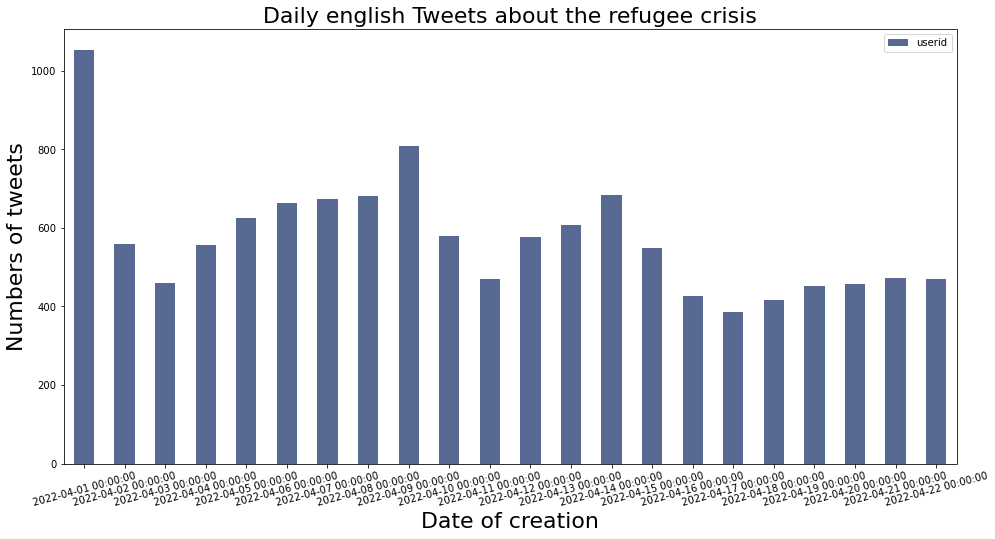

In [163]:
# plot per day 
ax = ref_en_daily_agg.plot(kind='bar', grid=False, figsize=(16,8), color='#586994', zorder=2, rot=15)
ax.set_xlabel('Date of creation',fontsize=22)
ax.set_ylabel('Numbers of tweets',fontsize=22)
ax.set_title('Daily english Tweets about the refugee crisis',fontsize=22)

In [164]:
# french 

# data to aggregate 
ref_fr_agg = ref_fr[['tweetcreatedts','userid']]

# group data per day and count
ref_fr_daily_agg= ref_fr_agg.groupby(pd.Grouper(key='tweetcreatedts', axis=0, freq='D')).count()

Text(0.5, 1.0, 'Daily french Tweets about the refugee crisis')

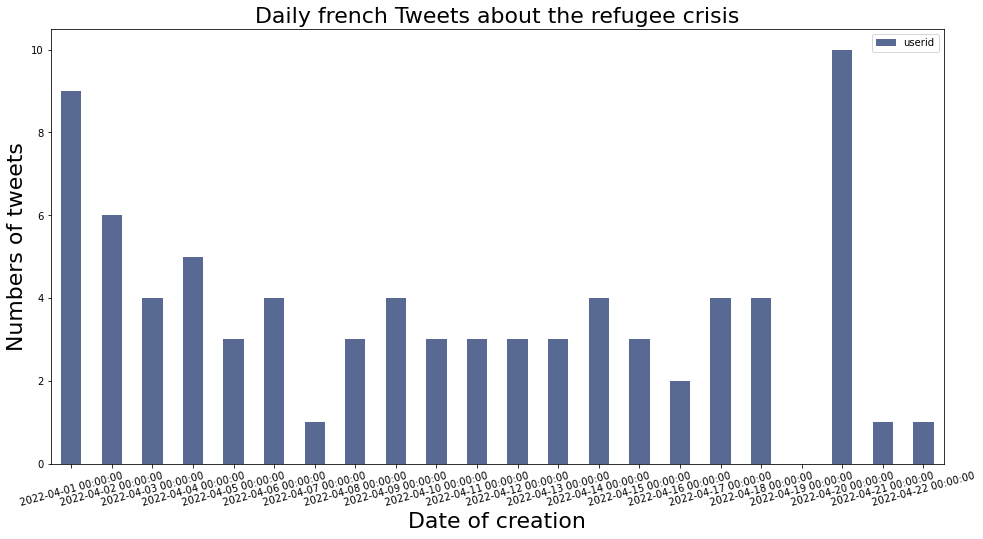

In [165]:
# plot per day 
ax = ref_fr_daily_agg.plot(kind='bar', grid=False, figsize=(16,8), color='#586994', zorder=2, rot=15)
ax.set_xlabel('Date of creation',fontsize=22)
ax.set_ylabel('Numbers of tweets',fontsize=22)
ax.set_title('Daily french Tweets about the refugee crisis',fontsize=22)

### Location distribution

In [223]:
# string type 
ref_fr['location']= ref_fr['location'].astype('string')
ref_fr['location'].fillna('unknown',inplace=True)

ref_en['location']= ref_en['location'].astype('string')
ref_en['location'].fillna('unknown',inplace=True)

In [227]:
# Locations are manually entered, we need to clean them for comparison ('London', 'london', 'london,england' should be grouped together)
def clean_location(loc):
    loc = loc.lower()
    loc_list = loc.split(',')
    loc = loc_list[0]
    return loc

In [228]:
ref_en['location'].iloc[1].lower()

'unknown'

In [231]:
ref_en['location'] = ref_en['location'].apply(lambda x: clean_location(x))

Text(0.5, 1.0, 'Location of english tweets about the refugee crisis')

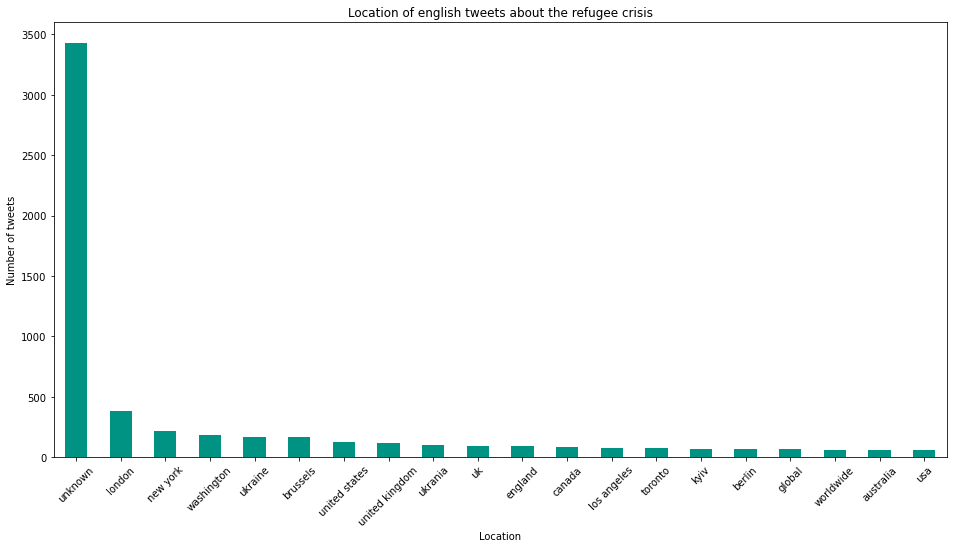

In [232]:
# plot 
ref_en_loc = ref_en.location.value_counts()[:20].plot.bar(figsize = (16,8),rot=45,color='#009384')

# parameters
ref_en_loc.set_xlabel('Location')
ref_en_loc.set_ylabel('Number of tweets')
ref_en_loc.set_title('Location of english tweets about the refugee crisis')


In [ ]:
# we keep the 20 first locations and group them by regions if they are part of the same region 
def merge_per_region(location):
    new_location = location 
    
    if (location == 'ukraine') or (location == 'kiev'):
        new_location = 'ukrania'
    
    if (location == 'uk') or (location == 'london') or (location =='england'):
        new_location = 'united kingdom'
    
    if (location == 'new york') or (location == 'washington') or (location == 'los angeles') or (location == 'usa'):
        new_location = 'ukrania':
        new_location = 'united states'
        
    if (location == 'toronto') :
        new_location = 'canada'
    
     if (location == 'global') :
        new_location = 'worldwide'
    
    return new_location

Text(0.5, 1.0, 'Location of english tweets about the refugee crisis')

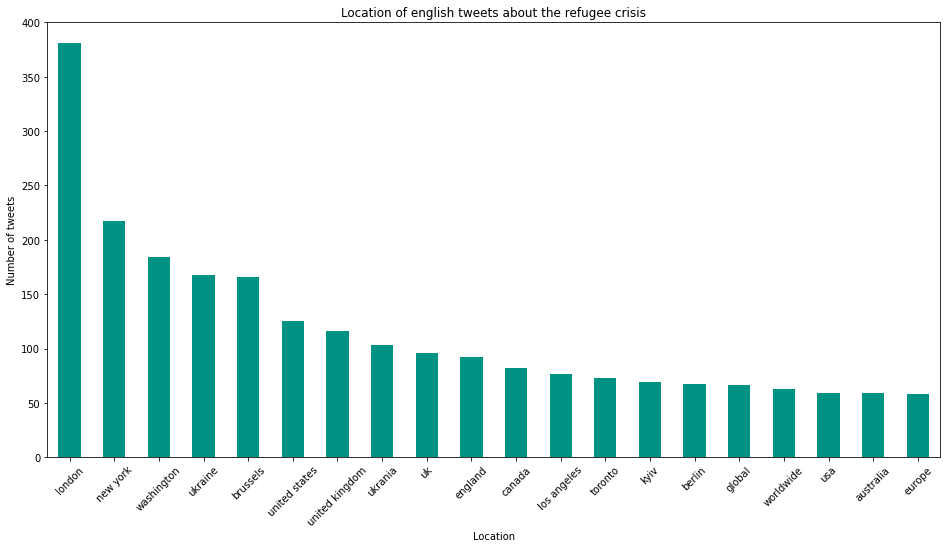

In [242]:
# subset without unknwon 

ref_en_with_loc = ref_en[ref_en['location']!='unknown']
# plot 
plot = ref_en_with_loc.location.value_counts()[:20].plot.bar(figsize = (16,8),rot=45,color='#009384')

# parameters
plot.set_xlabel('Location')
plot.set_ylabel('Number of tweets')
plot.set_title('Location of english tweets about the refugee crisis')


In [237]:
unkwn_loc_en = ref_en[ref_en['location']=='unknown']
per_unknown_en = len(unkwn_loc_en)/len(ref_en)*100
print('{:.4}% of location in the english tweets are unknown.'.format(per_unknown_en))

27.13% of location in the english tweets are unknown.


Text(0.5, 1.0, 'Location of french tweets about the refugee crisis')

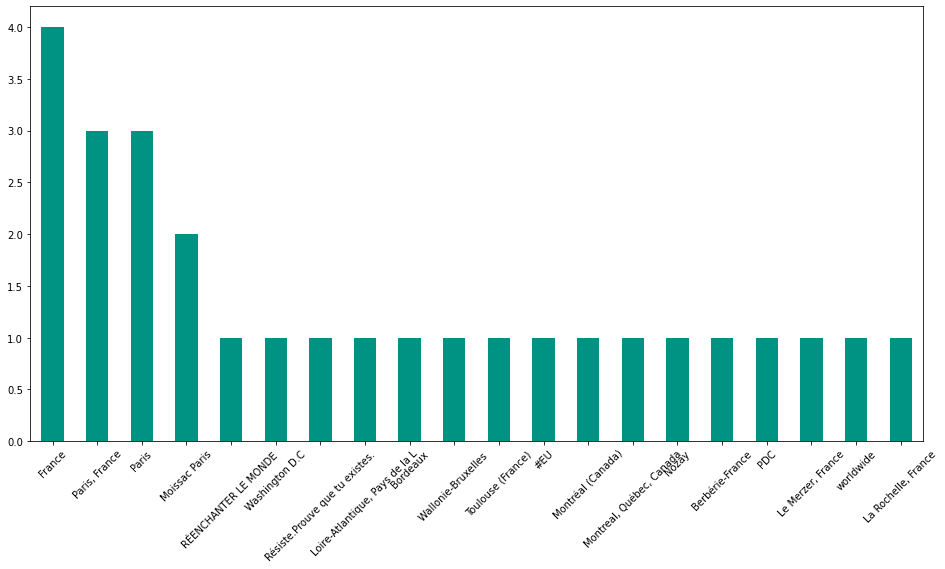

In [171]:
# french 
#ref_fr['location'] = ref_fr[ref_fr['location']== None].apply(lambda x :  x = '')
#ref_fr['location'] = ref_fr['location'].apply(lambda x : x.lower)

# plot 
ref_fr_loc = ref_fr.location.value_counts()[:20].plot.bar(figsize = (16,8),rot=45,color='#009384')

# parameters
ref_en_loc.set_xlabel('Location')
ref_en_loc.set_ylabel('Number of tweets')
ref_en_loc.set_title('Location of french tweets about the refugee crisis')


### Free up resources

### 4. Words frequency

Should we look at bigrams and trigrams?

In [301]:
# concatenate all texts cells 
all_ref_en = ref_en['text'].values.sum()

#Export all the tweets of interest in a single text file
text_file = open(gen_data_PATH+"all_tweets_en.txt", "w")
text_file.write(all_ref_en)
text_file.close()

In [303]:
#get rid of common english words
en_stopwords = nltk.corpus.stopwords.words('english') #list of words such as a, the, and etc..
     

# FUNCTION
def ngram_frequency(text,stopwords):
    '''
    Description: Counting the frequency of n-grams in the text
    Input: A single string containing the text of interest 
    Output: List of bigram and their counts in the text in the format ((string,string),integer)
    Requirement: Nltk with stopwords, Counter 
    Use: this function is set to find bigrams, it can be extended for other n-grams
    '''
    
    #separate the text into words 
    allWords = nltk.tokenize.word_tokenize(text) 
    
    #gets rid on 1-letter words and 2-letters words
    allLongWords = []
    for word in allWords:
        if len(word) > 2: 
            allLongWords.append(word)   
   
    allWordExceptStop =[]
    for w in allLongWords:
        if w.lower() not in stopwords:
            allWordExceptStop.append(w)
    #create a list of bigrams words in the text. Can be adapted to n-grams zipping more words
    onegrams = allWordExceptStop
    #calculate the frequency of each bigram 
    onegramsFreq = nltk.FreqDist(onegrams) 
    
    #bigrams = zip(allWordExceptStop, allWordExceptStop[1:])
    #calculate the frequency of each bigram 
    #bigramsFreq = nltk.FreqDist(bigrams) 
    return onegramsFreq

In [306]:
# english 

#Couting onegram frequencies for all articles of interest
onegramFreq_en = ngram_frequency(all_ref_en)

MAX = 10

#Visualize the most common bigrams
for word, frequency in onegramFreq_en.most_common(MAX):
        print('%s;%d' % (word, frequency))

refugees;10197
Ukraine;9795
URL;5976
Ukrainian;3604
refugee;2060
war;1979
help;1927
people;1804
Russia;1702
support;1547


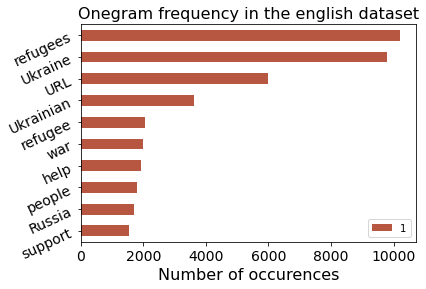

In [316]:
most_com_eng = pd.DataFrame(onegramFreq_en.most_common(MAX)).sort_values(by=[1],ascending=True)
plot = most_com_eng.set_index([0]).plot.barh(rot=25,color = '#b85741')

# parameters
plot.set_xlabel('Number of occurences',fontsize=16)
plot.set_ylabel('')
plot.set_title('Onegram frequency in the english dataset',fontsize=16)
plot.tick_params(axis='x', which='both', labelsize=14)
plot.tick_params(axis='y', which='both', labelsize=14)

stopwords(, str lower, remove urls,  no emoji, unescape? see https://www.kaggle.com/code/bwandowando/generate-wordcloud-from-english-tweets)

### ? Do we want to do TOPIC MODELING too?

### SCRATCH
some twitter tips from the assignemetn

## OLD FRENCH CODE

In [302]:
# concatenate all texts cells 
all_ref_fr = ref_fr['text'].values.sum()

#Export all the tweets of interest in a single text file
text_file = open(gen_data_PATH+"all_tweets_fr.txt", "w")
text_file.write(all_ref_fr)
text_file.close()

In [304]:
# french 
#Couting bigram frequencies for all articles of interest
onegramFreq_fr = ngram_frequency(all_ref_fr)

MAX = 10

#Visualize the most common bigrams
for word, frequency in onegramFreq_fr.most_common(MAX):
        print('%s;%d' % (word, frequency))

les;67
migrants;61
Ukraine;58
URL;49
des;46
pour;27
réfugiés;23
que;21
sur;20
est;18


<AxesSubplot:xlabel='0'>

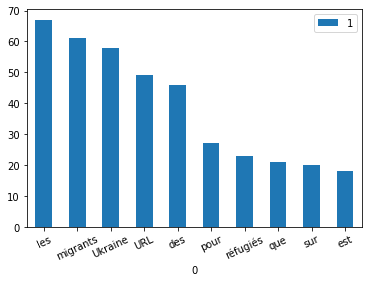

In [305]:
most_com_fr = pd.DataFrame(onegramFreq_fr.most_common(MAX))
most_com_fr.set_index([0]).plot.bar(rot=25)

Text(0, 0.5, 'Number of tweets')

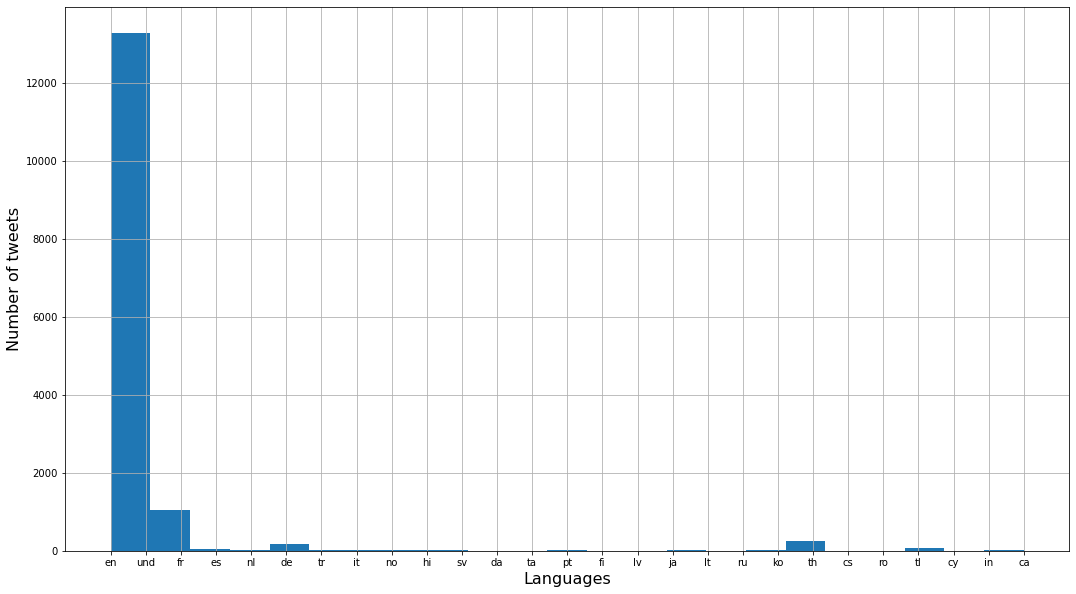

In [495]:
import matplotlib.pyplot as plt
# Distribution of language declared in tweet metadata
fig,ax = plt.subplots(figsize=(18, 10))
plt = data['lang'].hist(figsize=(18,10),bins = 23)
ax.set_xlabel('Languages',fontsize =16)
ax.set_ylabel('Number of tweets',fontsize =16)


In [496]:
## English
eng= len(df[df['lang']=='en'])/(len(df))*100
print(f'English is {eng} percent')
## German
de = len(df[df['lang']=='de'])/(len(df))*100
print(f'German is {de} percent')

## French
de = len(df[df['lang']=='fr'])/(len(df))*100
print(f'French is {de} percent')

## Italian
de = len(df[df['lang']=='it'])/(len(df))*100
print(f'Italian is {de} percent')

## Mandarin
de = len(df[df['lang']=='cmn'])/(len(df))*100
print(f'Mandarin chinese is {de} percent')

## Mandarin
de = len(df[df['lang']=='zh'])/(len(df))*100
print(f'Mandarin chinese is {de} percent')


## Hindi
hi = len(df[df['lang']=='hi'])/(len(df))*100
print(f'Hindi chinese is {hi} percent')

## Spanish
es = len(df[df['lang']=='es'])/(len(df))*100
print(f'Espagnol  is {es} percent')


## Arabic
ar = len(df[df['lang']=='ar'])/(len(df))*100
print(f'Arabic  is {ar} percent')

English is 82.89999999999999 percent
German is 1.1666666666666667 percent
French is 6.953333333333333 percent
Italian is 0.18 percent
Mandarin chinese is 0.0 percent
Mandarin chinese is 0.0 percent
Hindi chinese is 0.12 percent
Espagnol  is 0.26666666666666666 percent
Arabic  is 0.0 percent


In [497]:
n = len(data['lang'].unique())
print(f'There are {n} differents languages in our tweets\n with a majority of english tweets.')

There are 27 differents languages in our tweets
 with a majority of english tweets.


In [498]:
# Frequency of hashtags
hashdata = pd.concat([data.drop(['hashtags'], axis=1), data['hashtags'].apply(pd.Series)], axis=1)
hashdata.head()

,retweeted_status,lang,urls,user_mentions,symbols,media,0,1,2,3,4,5,6,7,8,9,10,11,12
0,"{'created_at': 'Sat Apr 09 15:53:40 +0000 2022', 'id': 1512821053201997824, 'id_str': '1512821053201997824', 'text': 'First #beachclean of the year ✅ Around 20 volunteers came &amp;we filled 3 big bags of #PlasticPollution, old fishing g… https://t.co...",en,[],"[{'screen_name': 'LeosAnimalPlan1', 'name': 'Leo's Animal Planet #STOPTHEGRIND 🐬🐳', 'id': 1369998441531727879, 'id_str': '1369998441531727879', 'indices': [3, 19]}]",[],NaN,"{'text': 'beachclean', 'indices': [27, 38]}","{'text': 'PlasticPollution', 'indices': [108, 125]}",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,"{'created_at': 'Sat Apr 09 11:25:01 +0000 2022', 'id': 1512753444037304321, 'id_str': '1512753444037304321', 'text': 'With our beautiful pink banner in Hyde Park! #EndFossilFuelsNow #JustStopOil #ClimateCrisis #ActNow… https://t.co/uNV7qN8LGx', 'disp...",en,[],"[{'screen_name': 'XRWorthing', 'name': 'XR Worthing', 'id': 1146461945882664961, 'id_str': '1146461945882664961', 'indices': [3, 14]}]",[],NaN,"{'text': 'EndFossilFuelsNow', 'indices': [61, 79]}","{'text': 'JustStopOil', 'indices': [80, 92]}","{'text': 'ClimateCrisis', 'indices': [93, 107]}","{'text': 'ActNow', 'indices': [109, 116]}","{'text': 'ExtinctionRebellion', 'indices': [117, 137]}",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,en,"[{'url': 'https://t.co/WjIg5MUUWz', 'expanded_url': 'https://twitter.com/i/web/status/1512842167798034438', 'display_url': 'twitter.com/i/web/status/1…', 'indices': [116, 139]}]","[{'screen_name': 'lisamurkowski', 'name': 'Sen. Lisa Murkowski', 'id': 18061669, 'id_str': '18061669', 'indices': [0, 14]}, {'screen_name': 'Sen_JoeManchin', 'name': 'Senator Joe Manchin', 'id': 234374703, 'id_str': '234374703', 'indices': [15, 30]}, ...",[],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,en,"[{'url': 'https://t.co/8IhHLu4iOD', 'expanded_url': 'https://twitter.com/i/web/status/1512842175842861060', 'display_url': 'twitter.com/i/web/status/1…', 'indices': [116, 139]}]","[{'screen_name': 'edhollett', 'name': 'Edward Hollett', 'id': 17963341, 'id_str': '17963341', 'indices': [0, 10]}]",[],NaN,"{'text': 'BayDuNord', 'indices': [70, 80]}","{'text': 'ClimateChange', 'indices': [93, 107]}",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,"{'created_at': 'Fri Mar 25 02:18:43 +0000 2022', 'id': 1507180146285072388, 'id_str': '1507180146285072388', 'text': '@IndivisibleMNLo @GovTimWalz .@IndivisibleMNLo and @WomensMarchMN both stopped their zoom recordings before the wor… https://t.co/E0z...",en,[],"[{'screen_name': 'MNSnarkDept', 'name': 'MN Department Of Snark', 'id': 1418211881337069575, 'id_str': '1418211881337069575', 'indices': [3, 15]}, {'screen_name': 'IndivisibleMNLo', 'name': 'Indivisible MNLeg', 'id': 831517301312733184, 'id_str': '831...",[],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [499]:
wordsList = []

def get_text(i):
    if (data.iloc[i]['hashtags']!=None):
        text = data.iloc[i]['hashtags'][0]['text'] 
        #print(text)
        wordsList.append(text)


In [500]:
get_text(3)

In [501]:
wordsList

['BayDuNord']

In [502]:
# counts words for each row
for i in range(len(data)):
     get_text(i)

In [504]:
dic_counts = dict(counts)

In [505]:
values = pd.DataFrame.from_dict(dic_counts,orient='index')
values.head()

,0
BayDuNord,3
beachclean,4
EndFossilFuelsNow,3
ExtinctionRebellion,32
ClimateCrisis,2194


In [506]:
values = values.rename(columns={0:'Frequency'})
values = values.sort_values('Frequency',ascending=False)
values

,Frequency
ClimateCrisis,2194
LetTheEarthBreath,1158
GIEC,536
climatechange,511
IPCC,260
...,...
LNP,1
CoalBaronBlockade,1
Netflix,1
Asian,1


In [507]:
values['Rank'] = np.arange(values.shape[0])

In [508]:
values.index.name = 'Hashtags'
values

,Frequency,Rank
Hashtags,,
ClimateCrisis,2194,0
LetTheEarthBreath,1158,1
GIEC,536,2
climatechange,511,3
IPCC,260,4
...,...,...
LNP,1,787
CoalBaronBlockade,1,788
Netflix,1,789


In [509]:
values.reset_index(inplace=True)

In [510]:
values.drop(columns = ['Rank'],inplace=True)

In [511]:
values.index.name = '# Rank'
values.head(30)

,Hashtags,Frequency
# Rank,,
0,ClimateCrisis,2194
1,LetTheEarthBreath,1158
2,GIEC,536
3,climatechange,511
4,IPCC,260
5,COP26,247
6,ClimateChange,192
7,ClimateAction,186
8,scientistprotest,154


In [512]:
values.head(30).to_csv(index=False)

'Hashtags,Frequency\nClimateCrisis,2194\nLetTheEarthBreath,1158\nGIEC,536\nclimatechange,511\nIPCC,260\nCOP26,247\nClimateChange,192\nClimateAction,186\nscientistprotest,154\nLetTheEarthBreathe,137\nclimat,115\nsolar,87\nClimateEmergency,75\nClimateActionNow,62\nclimate,53\nClimateReport,51\nScientistprotest,43\nclimatecrisis,37\nActOnClimate,36\nspreadawareness,35\nClimatechange,34\nSaveSoil,33\nExtinctionRebellion,32\nFridaysForFuture,29\nClimateJustice,26\nclimateaction,25\nsavetheearth,24\nauspol,20\nFossilFuels,19\nElectricVehicles,19\n'

## 5. Handles

In [513]:
# Percentage of tweets directly generated by all the 20 media accounts
#together.
media_list

['@nytimes',
 '@TelegraphNews',
 '@GuardianNews',
 '@Newsweek',
 '@BBCAfrica',
 '@Independent',
 '@FRANCE24',
 '@CNBC',
 '@politico',
 '@SkyNewsBreak',
 '@AJENews',
 '@FT',
 '@BreakingNew',
 '@SkyNews',
 '@NDTVFeed',
 '@guardian',
 '@HuffPost',
 '@XHNews',
 '@AP',
 '@ABC']

In [514]:
#get user data into a data frame 
def get_user(i):
    if (df.iloc[i]['user']!=None):
        name = df.iloc[i]['user']['name'] 
        return name


In [515]:
df['username'] = df['user'].apply(lambda x: x['name'])

In [516]:
df[['id','text','username']]

,id,text,username
0,1512842143336910849,"RT @LeosAnimalPlan1: First #beachclean of the year ✅ Around 20 volunteers came &amp;we filled 3 big bags of #PlasticPollution, old fishing gear…",Pam Sharman 🌻🌻🌻🌻🇺🇦🇺🇦🇺🇦🌠🌠
1,1512842152811937795,RT @XRWorthing: With our beautiful pink banner in Hyde Park! #EndFossilFuelsNow #JustStopOil #ClimateCrisis \n#ActNow #ExtinctionRebellion h…,Things have to change! - Rejoin & Reform
2,1512842167798034438,@lisamurkowski @Sen_JoeManchin @AESymposium Here’s a big idea:\nDeclare your support for making the Arctic a Global… https://t.co/WjIg5MUUWz,salty seadude 🇺🇸Defend Democracy & Environment
3,1512842175842861060,@edhollett You ARE wrong. We need to stop using fossil fuels now.\nBDN #BayDuNord will add to #ClimateChange.\n\nMost… https://t.co/8IhHLu4iOD,Mark Dolore
4,1512842180154773505,RT @MNSnarkDept: @IndivisibleMNLo @GovTimWalz .@IndivisibleMNLo and @WomensMarchMN both stopped their zoom recordings before the worst of w…,Joni Skibo/LaCroix❤️🇺🇦💪
...,...,...,...
995,1514604074091495439,RT @JimGumboc: Why did they arrest the scientists for speaking up? This quote from Don't Look UP is so apt:\n“How is it criminal if we just…,liu qingge's
996,1514604074297344000,https://t.co/38fObpZyDU,‼️ LET THE EARTH BREATH ‼️
997,1514604074599034881,"@_GlobalCrisis_ I'm afraid to imagine the magnitude of the consequences of a 10-ball #earthquake in #Japan, in a ci… https://t.co/by7fhBz8br",Vieda
998,1514604075102339078,RT @LHS4LIF3R: “What can we do to help as a normal person?” #LetTheEarthBreath #ScientistRebellion #scientistsprotest #ClimateCrisis /c htt…,🍓L(ia) ≷ Cas


In [517]:
media_list_names =[]
for string in media_list:
    media_list_names.append(string[1:])
media_list_names 

['nytimes',
 'TelegraphNews',
 'GuardianNews',
 'Newsweek',
 'BBCAfrica',
 'Independent',
 'FRANCE24',
 'CNBC',
 'politico',
 'SkyNewsBreak',
 'AJENews',
 'FT',
 'BreakingNew',
 'SkyNews',
 'NDTVFeed',
 'guardian',
 'HuffPost',
 'XHNews',
 'AP',
 'ABC']

In [518]:
# select tweet if names are in list 

not_retweet = df[df['retweeted_status'].isna()]

in_medias = not_retweet[not_retweet['username'].isin(media_list_names)]
per_medias = len(in_medias)/len(not_retweet)
print(f'There are {per_medias}% of direct tweets from the media list')

There are 0.0% of direct tweets from the media list


In [519]:
#cleaning ngo list
ngo_list_names =[]
for string in ngo_list:
    ngo_list_names.append(string[1:])
ngo_list_names 

# select tweet if names are in list 
in_ngos = not_retweet[not_retweet['username'].isin(ngo_list_names)]
per_ngos = len(in_ngos)/len(not_retweet)
print(f'There are {per_ngos}% of direct tweets from the ngo list')

There are 0.0% of direct tweets from the ngo list


In [520]:
#Percentage of tweets generated by all the 20 media accounts that appear as retweets in the sample.
retweet = df[df['retweeted_status'].isna() == False]

in_medias = retweet[retweet['username'].isin(media_list_names)]
per_medias = len(in_medias)/len(retweet)
print(f'There are {per_medias}% of retweets from the media list')


There are 0.0% of retweets from the media list


In [521]:
# select tweet if names are in list 
in_ngos = retweet[retweet['username'].isin(ngo_list_names)]
per_ngos = len(in_ngos)/len(retweet)
print(f'There are {per_ngos}% of retweets from the ngo list')

There are 0.0% of retweets from the ngo list


## 6. Discussion

Point 4:  
The resuts are coherent with my initial hypothesis,namely that it would be mostly an english corpus. I was slightly surprised by the importance of retweet as I am not a user of twitter but it makes sense with respect to what we have learn in class.  

Point 5: 
Well I am wondering it there is an error in my code, as none of the tweets are coming or are retweeted by the media and NGO I've selectionned. However some sample are really small, for example the non retweeted samples are 2724 tweets, as there are  400 million users it then makes sense that only 20 handles are not even represented in the dataset. It is slightly more suprising for the larger datset of 12'276 tweets.

In [524]:
len(not_retweet)

2724

In [526]:
len(retweet)

12276